In [1]:
!pip install plotly
!pip install cufflinks

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings

%matplotlib inline

In [13]:
jsysoo = pd.read_csv("data/대회 설문조사지.csv", encoding = "cp949")
jsysoo

,타임스탬프,학년,성별,학과(전공),취미,평균 공부 시간,공부하는 시간,자격증 개수,출석,평균 수면 시간,...,희망 연봉,학과 만족 O/X,취업 선호도,소셜 미디어 사용시간,통학 시간,학업 스트레스,교우관계,알바 유무,방과후 유무,방과후 만족도
0,2023. 10. 12 오후 12:21:46,2학년,남자,창업마케팅과,운동,1시간-2시간,방과후(저녁),4,절대 안빠지죠,6시간 이상 자요,...,3000,O,5,1시간-2시간,10-30분,2,3,X,O(아래 질문에 답변해주세요!),8.0
1,2023. 10. 12 오후 12:21:49,2학년,남자,창업마케팅과,게임,0-30분,기타,4,반년에 한두번 빠져요,4~6시간 자요,...,2000,O,5,2시간-3시간 이상,10-30분,3,2,X,O(아래 질문에 답변해주세요!),5.0
2,2023. 10. 12 오후 12:23:07,3학년,남자,소프트웨어개발과,게임,0-30분,기타,6,절대 안빠지죠,6시간 이상 자요,...,3000,O,7,1시간-2시간,10-30분,2,1,X,X,NaN
3,2023. 10. 12 오후 12:23:25,3학년,남자,소프트웨어개발과,게임,0-30분,밤,5,절대 안빠지죠,4~6시간 자요,...,3000,O,5,0-30분,10-30분,3,1,X,X,1.0
4,2023. 10. 12 오후 12:23:28,2학년,남자,창업마케팅과,음악,0-30분,기타,6,한달에 한두번 빠져요,2~4시간 자요,...,?,O,5,2시간-3시간 이상,1시간-2시간,1,1,O,X,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,2023. 10. 17 오후 3:24:40,2학년,남자,스마트웹콘텐츠과,게임,0-30분,방과후(저녁),4,한달에 한두번 이상 빠져요,6시간 이상 자요,...,4000,O,7,2시간-3시간 이상,10-30분,3,1,X,X,NaN
283,2023. 10. 17 오후 3:27:17,2학년,남자,스마트웹콘텐츠과,게임,0-30분,방과후(저녁),4,절대 안빠지죠,6시간 이상 자요,...,?,O,5,2시간-3시간 이상,10-30분,3,1,X,X,1.0
284,2023. 10. 17 오후 3:27:41,2학년,남자,스마트웹콘텐츠과,운동,2시간-3시간 이상,방과후(저녁),4,절대 안빠지죠,4~6시간 자요,...,?,O,4,1시간-2시간,30-1시간,3,1,X,O(아래 질문에 답변해주세요!),8.0
285,2023. 10. 17 오후 3:28:23,2학년,남자,스마트웹콘텐츠과,운동,30분-1시간,밤,2,한달에 한두번 빠져요,6시간 이상 자요,...,5000,O,5,1시간-2시간,30-1시간,3,3,O,X,NaN


In [51]:
male = jsysoo[jsysoo["성별"]=="남자"].sample(n=90)
female = jsysoo[jsysoo["성별"]=="여자"]

In [79]:
new_jsysoo = pd.concat([male,female])
new_jsysoo=pd.melt(new_jsysoo,id_vars=["희망 연봉"],value_vars=["학과(전공)"])

In [80]:
new_jsysoo

,희망 연봉,variable,value
0,2000,학과(전공),금융경영과
1,8000,학과(전공),금융경영과
2,4000,학과(전공),스마트웹콘텐츠과
3,4000,학과(전공),금융경영과
4,3000,학과(전공),소프트웨어개발과
...,...,...,...
182,2000,학과(전공),스마트웹콘텐츠과
183,8000,학과(전공),스마트웹콘텐츠과
184,?,학과(전공),스마트웹콘텐츠과
185,5000,학과(전공),스마트웹콘텐츠과


In [48]:
jsysoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   타임스탬프        287 non-null    object 
 1   학년           287 non-null    object 
 2   성별           287 non-null    object 
 3   학과(전공)       287 non-null    object 
 4   취미           287 non-null    object 
 5   평균 공부 시간     287 non-null    object 
 6   공부하는 시간      287 non-null    object 
 7   자격증 개수       287 non-null    object 
 8   출석           287 non-null    object 
 9   평균 수면 시간     287 non-null    object 
 10  희망 진로        287 non-null    object 
 11  수업 집중도       287 non-null    int64  
 12  수업 집중도(전공)   287 non-null    int64  
 13  희망 연봉        287 non-null    object 
 14  학과 만족 O/X    287 non-null    object 
 15  취업 선호도       287 non-null    int64  
 16  소셜 미디어 사용시간  287 non-null    object 
 17  통학 시간        287 non-null    object 
 18  학업 스트레스      287 non-null    int64  
 19  교우관계    

(1.0, 4.0)

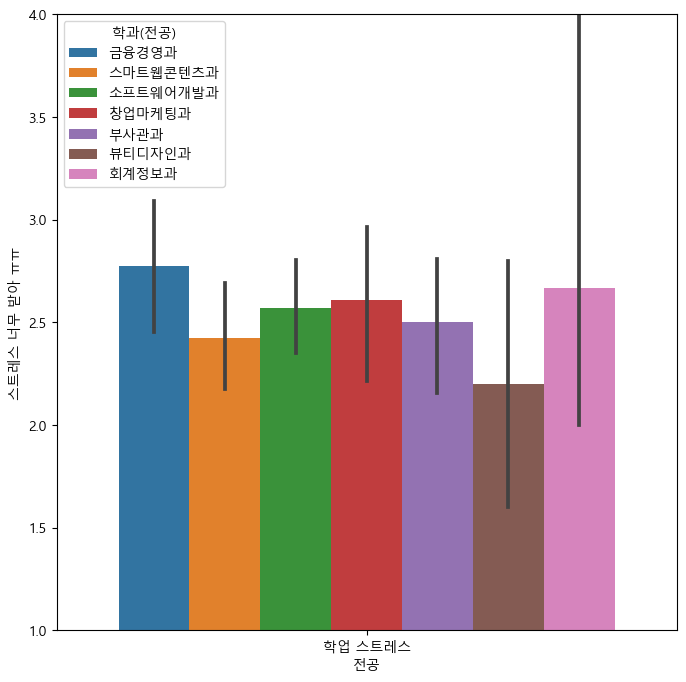

In [70]:
plt.figure(figsize=(8,8))
sns.barplot(data=new_jsysoo, x="variable", y="value",hue="학과(전공)", dodge=True)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.xlabel("전공")
plt.ylabel("스트레스 너무 받아 ㅠㅠ")
plt.ylim(1,4)

(1.0, 10.0)

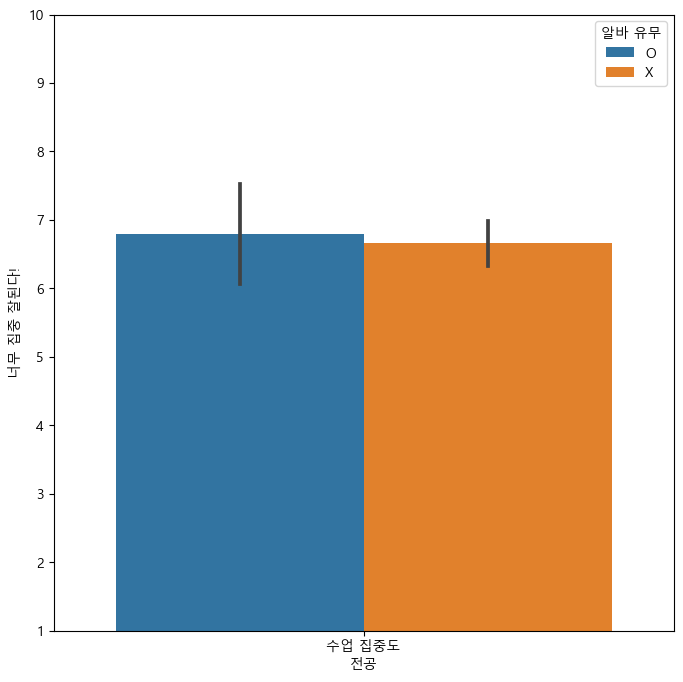

In [77]:
plt.figure(figsize=(8,8))
sns.barplot(data=new_jsysoo, x="variable", y="value",hue="알바 유무", dodge=True)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.xlabel("전공")
plt.ylabel("너무 집중 잘된다!")
plt.ylim(1,10)

In [82]:
plt.figure(figsize=(8,8))
sns.barplot(data=new_jsysoo, x="variable", y="value",hue="희망 연봉", dodge=True)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.xlabel("전공")
plt.ylabel("돈이 너무 좋아~")
plt.ylim(1,10)

TypeError: Neither the `x` nor `y` variable appears to be numeric.

<Figure size 800x800 with 0 Axes>